In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def genPoints(num, x_min, x_max, y_min, y_max):
    x =  x_max - x_min  
    y =  y_max - y_min
    return np.array([[random.random() * x + x_min , random.random()*y + y_min] for _ in range(num)])

In [3]:
def distance(p1,p2):
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5

In [4]:
def drawPoints(points, c):
    #print('len(points):',len(points))
    if len(points) < 1: return
    plt.scatter(points[:,0],points[:,1],c = c) 

In [5]:
def meanPoint(ps, c):
    if len(ps) < 1: return random.choice(points)
    x = np.mean(ps[:,0])
    y = np.mean(ps[:,1])
    #print(p)
    return [x,y]

In [218]:
 def drawResult(clus,center,t):
    #绘图
    colors = ['g','m','b','c']
    plt.figure()
    plt.title("epoci {}".format(t))
    p = np.array(center)
    plt.scatter(p[:,0],p[:,1],marker='+',s = 600, c = 'r')
    for ps, c  in zip(clus,colors):
        #print(ps)
        drawPoints(np.array(ps),c)

[115  49 118  69]


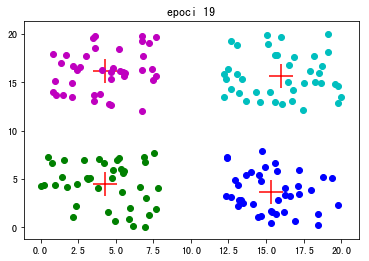

In [220]:
#产生点集
num = 40
points1 = genPoints(num, 0, 8, 0, 8)
points2 = genPoints(num, 0, 8, 12, 20)
points3 = genPoints(num, 12, 20, 0, 8)
points4 = genPoints(num, 12, 20, 12, 20)
points = np.concatenate((points1,points2,points3,points4))
#plt.scatter(points[:,0],points[:,1])

# #训练
centerIndex = np.random.choice(len(points),4,replace = False)
print(centerIndex)
center = points[centerIndex]
#center
for t in range(20):
    #print(t)
    clus = [[] for _ in range(4)]
    for p in points:
        dis = []
        for  c in center:
            dis.append(distance(c,p))
        index = np.where(dis == np.min(dis))
#         print(type(index))
#         print('index: ',index)
#         for i in index[0]:
#             #print('i: ',i)
#             clus[int(i)].append(p)
        clus[int(index[0])].append(p)
    temp = []
    for ps, c in zip(clus,center):
        c = meanPoint(np.array(ps),c)
        temp.append(c)
    center = temp
    #print(center)
    #print(c)
    
drawResult(clus,center,t)

In [89]:
len(clus),center

(4,
 [[4.251036724156199, 4.576515741061842],
  [4.6300000092271745, 16.035642926442357],
  [15.951769416893052, 9.757046745025026],
  [15.951769416893052, 9.757046745025026]])